In [85]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from scipy.stats import multivariate_normal

# Data set

In [86]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print("Number of samples: ", X.shape[0])
print("Number of features: ", X.shape[1])
print("Number of labels: ", Y.shape[0])

Number of samples:  150
Number of features:  4
Number of labels:  150


# Part 1: K-means


Implement the "basic" K-means algorithm (as seen in the lectures, and without using scikit-learn or any library providing directly an implementation of the algorithm). 

In [87]:
# Implementation of the basic K-means algorithm

# Convention:
# data: matrix of dimension number of data points * number of features
# clusters: array of sets of integers (data point indices); each cluster is 
# represented by a "set" data structure
# centroids: matrix of dimension number of clusters * number of features

def init_centroids(K, data):
  # An arbitrary initialization: use the first data points
  # (see Part 3 for more on this topic)
  centroids = np.asarray([data[k].copy() for k in range(K)])
  return centroids

def update_centroids(clusters, data):
  # Given the clusters, return the corresponding means
  K = clusters.shape[0]
  centroids = np.zeros((K,data.shape[1])) # TODO: replace
  # we update centroids based on each cluster
  for k in range(K):
    cluster = clusters[k]
    cluster_data = []
    # here we check the data inside each cluster
    for c in cluster:
      cluster_data.append(data[c])
    cluster_array = np.array(cluster_data)
    centroids[k] = np.mean(cluster_array,axis = 0)
  return centroids

# We use the following function to measure the distance between 2 points
dist_fct = lambda p1, p2: np.linalg.norm(p1-p2) 

def compute_clusters(centroids, data):
  # Given the centroids, return the list of clusters
  K = centroids.shape[0]
  clusters = np.asarray([set()for i in range(K)])# TODO: replace
  # here we get the number of data points (rows number)
  N = data.shape[0]
  for n in range(N):
    data_point = data[n]
    dist_lst = []
    # here we iterate based on each cluster, to calculate the distance between 
    # each centroid with each data point
    for k in range(K):
      c = centroids[k]
      dist = np.linalg.norm(data_point-c)
      #this list covers the distance from point n to all centroids 
      dist_lst.append(dist)
    # we only need the smallest distance between one data point and one centroid
    m = min(dist_lst)
    # find the position of cluster where the distance is the minimum
    cluster = dist_lst.index(m)
    clusters[cluster].add(n)
  return clusters

def k_means_step(centroids, data):
  # One step of K-means algorithm: update centroids and clusters
  new_clusters = compute_clusters(centroids, data)
  new_centroids = update_centroids(new_clusters, data)
  return new_centroids, new_clusters

def k_means(K, data):
  # K-means algorithm
  # Initialization
  iiter = 0
  centroids = init_centroids(K, data)
  centroids, clusters = k_means_step(centroids, data)
  # Measure of successs: sum of average distances
  total_d = unweighted_dist_centroid(centroids, clusters, data)
  print("K-means, iteration = ", iiter, " avg distance = ", total_d)
  cont = True # flag to continue or stop the loop
  while cont:
    # insert K-means loop
    new_centroids,new_clusters = k_means_step(centroids,data)
    iiter+=1
    if (new_clusters == clusters).all():
      cont = False
    centroids, clusters = new_centroids, new_clusters
    # Measure of successs: sum of average distances
    total_d = unweighted_dist_centroid(centroids, clusters, data)
    print("K-means, iteration = ", iiter, " total distance = ", total_d)
  return centroids, clusters

Run the algorithm for $K=1, 2, 3, 4, 5, 6, 7$ on the iris flower data set. For each $K$, compute the average distance to the mean position, as well as the total (unweighted) distance, defined respectively by:
$$
    D_K = \sum_{k=1}^K \frac{1}{|C_k|} \sum_{x^i \in C_k} \|x^i - m_k\|^2,
    \qquad 
    T_K = \sum_{k=1}^K \sum_{x^i \in C_k} \|x^i - m_k\|^2,
$$
which depend on the clusters $C_1, \dots, C_K$. When running the K-means algorithm, the clusters $(C_1, \dots, C_K)$ are adjusted until you get a (minimal or locally minimal) value for $D_K$. Plot the values of these two quantities as functions of $K$. Is there an elbow in the curves?




========== K-means for K =  1  ==========
K-means, iteration =  0  avg distance =  681.3706000000001
K-means, iteration =  1  total distance =  681.3706000000001


========== K-means for K =  2  ==========
K-means, iteration =  0  avg distance =  639.4177574967405
K-means, iteration =  1  total distance =  198.83500449559438
K-means, iteration =  2  total distance =  157.73801291793316
K-means, iteration =  3  total distance =  152.34795176035792
K-means, iteration =  4  total distance =  152.34795176035792


========== K-means for K =  3  ==========
K-means, iteration =  0  avg distance =  555.5665701736465
K-means, iteration =  1  total distance =  93.30594900437106
K-means, iteration =  2  total distance =  85.14317582417584
K-means, iteration =  3  total distance =  83.97458974358975
K-means, iteration =  4  total distance =  83.28096715927751
K-means, iteration =  5  total distance =  81.98358129265355
K-means, iteration =  6  total distance =  81.27780000000001
K-means, iterati

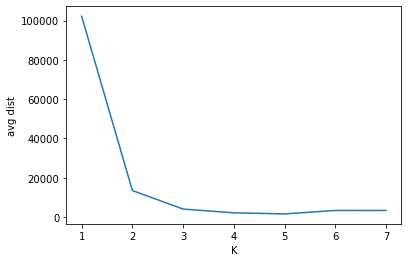

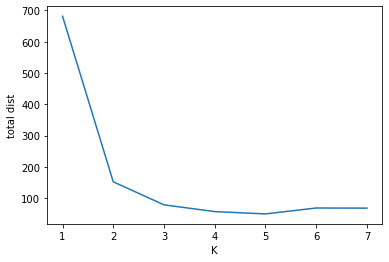

<Figure size 432x288 with 0 Axes>

In [88]:
def avg_dist_centroid(centroids, clusters, data):
  # Given centroids and corresponding clusters, compute average distances
  K = centroids.shape[0]

  dist = 0 # TODO: replace
  # we iterate in each cluster
  for k in range(K):
    centroid = centroids[k]
    sum_x = 0
    for i in clusters[k]:
      element = data[i]
      point_dist = np.linalg.norm(element-centroid)**2
      sum_x += point_dist
    Ck = len(clusters[k])
    avg_k = Ck*sum_x
    dist += avg_k
  return dist
    
def unweighted_dist_centroid(centroids, clusters, data):
  # Given centroids and corresponding clusters, compute total distances
  K = centroids.shape[0]

  dist = 0
  for k in range(K):
    centroid = centroids[k]
    sum_x = 0
    for i in clusters[k]:
      element = data[i]
      point_dist = np.linalg.norm(element-centroid)**2
      sum_x += point_dist
    dist += sum_x
  return dist
  
# Tests
avg_distances = []
total_distances = []
K_values = np.arange(1, 8)
for K in K_values:
  print("\n\n========== K-means for K = ", K, " ==========")
  centroids, clusters = k_means(K, X)
  avg_distances.append(avg_dist_centroid(centroids, clusters, X))
  total_distances.append(unweighted_dist_centroid(centroids, clusters, X))

plt.plot(K_values, avg_distances)
plt.xlabel("K")
plt.ylabel("avg dist")
plt.show()
plt.clf()

plt.plot(K_values, total_distances)
plt.xlabel("K")
plt.ylabel("total dist")
plt.show()
plt.clf()

There is an elbow point at K=2.

Now, let us use the labels just to evaluate our results. Consider the clusters obtained with $K=1, 2, 3, 4, 5, 6, 7$. For each cluster, compute the corresponding label by taking the majority vote. In this way, how many samples were incorrectly labeled?


In [89]:
def count_errors(clusters, data, labels):
  # Return the number of errors if we use majority voting each cluster and then
  # use the labels to check how many errors it makes
  # labels: array of size number of data points
  nb_errs = 0
  for k in range(K):
    cluster = clusters[k]
    label_list = []
    for i in cluster:
      label_list.append(labels[i])
    label,count = np.unique(label_list,return_counts = True)
    nb_errs += np.sum(sorted(count)[:-1])
  return nb_errs

K_values = np.arange(1, 8)
for K in K_values:
  print("\n\n========== K-means for K = ", K, " ==========")
  centroids, clusters = k_means(K, X)
  print("Number of errors: ", count_errors(clusters, X, Y))



========== K-means for K =  1  ==========
K-means, iteration =  0  avg distance =  681.3706000000001
K-means, iteration =  1  total distance =  681.3706000000001
Number of errors:  100


========== K-means for K =  2  ==========
K-means, iteration =  0  avg distance =  639.4177574967405
K-means, iteration =  1  total distance =  198.83500449559438
K-means, iteration =  2  total distance =  157.73801291793316
K-means, iteration =  3  total distance =  152.34795176035792
K-means, iteration =  4  total distance =  152.34795176035792
Number of errors:  50


========== K-means for K =  3  ==========
K-means, iteration =  0  avg distance =  555.5665701736465
K-means, iteration =  1  total distance =  93.30594900437106
K-means, iteration =  2  total distance =  85.14317582417584
K-means, iteration =  3  total distance =  83.97458974358975
K-means, iteration =  4  total distance =  83.28096715927751
K-means, iteration =  5  total distance =  81.98358129265355
K-means, iteration =  6  total d

# Part 2: GMM+EM

## Question 4

Implement the "basic" Expectation-Maximization (EM) algorithm with Gaussian Mixture Model (GMM) (as seen in the lectures, and without using scikit-learn or any library providing directly an implementation of the algorithm).


In [90]:
# Implementation of the basic Expectation-Maximization algorithm

# Convention:
# data: matrix of dimension number of data points * number of features
# params: triple of weights, means, covs; each of length = number of clusters
# - weights contains the weights for the mixture of Gaussian distributions
# - means contains the means of the Gaussian distributions
# - covs contains the covariances of the Gaussian distributions

def init_gaussians(K, data):
  # An arbitrary initialization: use the first data points
  # and covariance = identity matrix
  # (see Part 3 for more on this topic)
  weights = [1/K for k in range(K)]
  means = [data[k].copy() for k in range(K)]
  dim = data.shape[1]
  covs = [np.eye(dim) for k in range(K)]
  return weights, means, covs

def expectation_step(params, data):
  # Expectation step in EM algorithm: given the GMM parameters, return
  # the conditional probabilities of the cluster indices
  n_samples = data.shape[0]
  weights, means, covs = params #[0], params[1], params[2]
  K = len(weights)
  probas = np.zeros((n_samples,K)) 
  for n in range(n_samples):
    # for n-th data, update the prob of the i-th cluster, which shows
    #a prob matrix with size N*K
    # p_value is the value of the i_th gaussian distribution on data point n
    s_value = np.sum([multivariate_normal(means[i], covs[i],allow_singular = True).pdf(data[n])*weights[i] for i in range (K)])
    for k in range(K):
      p_value = multivariate_normal(means[k],covs[k],allow_singular = True).pdf(data[n])*weights[k]
      probas[n][k] = p_value/s_value
    

  return np.asarray(probas)

def maximization_step(probas, data):
  # Maximization step in EM algorithm: given the probabilities, return the new
  # parameters for GMM. Here we use formulas obtained by finding maximizers of 
  # the modified likelihood function.
  K = probas.shape[1]
  
  params = init_gaussians(K, data)  # TODO: replace
  N = data.shape[0]
  for k in range(K):
    sum_probas = np.sum(probas[n][k] for n in range(N))
    sum_probas_x = np.sum(probas[n][k]*data[n] for n in range(N))
    weight = sum_probas/N
    mean_k = sum_probas_x/sum_probas
    sum_probas_covs = np.sum(probas[n][k]*(np.array([data[n]-mean_k]).T@ np.array([data[n]-mean_k])) for n in range(N))
    cov_k = sum_probas_covs/sum_probas


    params[0][k] = weight
    params[1][k] = mean_k
    params[2][k] = cov_k
  return params

  
def em_algorithm(K, data, n_iter):
  # Expectation-maximization algorithm: return the GMM parameters
  params = init_gaussians(K, data)
  
  
  for i in range(n_iter):
    probas = expectation_step(params,data)
    params = maximization_step(probas, data)
  return params


Run the algorithm for $K=1, 2, 3, 4, 5, 6, 7$ on the iris flower data set. For each $K$, compute the likelihood:
$$
    L_K = \sum_{i=1}^N \sum_{m=1}^K \mathbb{P}_{\theta}(Z^i = m|X^i=x^i) \log(p_{\theta}(x^i,m
    )),
$$
which depends on the parameter $\theta = (\sigma_1,\mu_1,\pi_1, \dots,\sigma_M,\mu_M,\pi_M)$ of the GMM. When running the EM algorithm, the parameter $\theta$ is adjusted until you get a (minimal or locally minimal) value for $L_K$. Plot this value as a function of $K$. 



========== K-means for K =  1  ==========


/var/folders/6f/v5_vm1k90cdc80sb2rp4zc3m0000gn/T/ipykernel_1922/2900836974.py:49: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_probas = np.sum(probas[n][k] for n in range(N))
/var/folders/6f/v5_vm1k90cdc80sb2rp4zc3m0000gn/T/ipykernel_1922/2900836974.py:50: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_probas_x = np.sum(probas[n][k]*data[n] for n in range(N))
/var/folders/6f/v5_vm1k90cdc80sb2rp4zc3m0000gn/T/ipykernel_1922/2900836974.py:53: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_probas_covs = np.sum(probas[n][k]*(np.array([data[n]-mean_k]).T@ np.array([data[n]-mean_k])) 



========== K-means for K =  2  ==========


========== K-means for K =  3  ==========


========== K-means for K =  4  ==========


========== K-means for K =  5  ==========


========== K-means for K =  6  ==========


========== K-means for K =  7  ==========


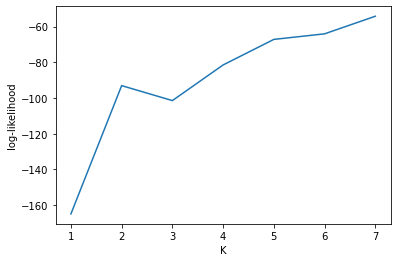

<Figure size 432x288 with 0 Axes>

In [91]:
# TODO: complete

def log_likelihood(params, data):
  # Compute the log-likelihood
  log_l = 0
  # TODO: complete
  # from the log likelihood formula, we should calculate the expectation parts
  # and the log parts.
  N = data.shape[0]
  K = len(params[0])
  # we first calculate the expectation part
  probas = expectation_step(params, data)
  for n in range(N):
    temp = 0
    for k in range(K):
      # we calculate the log parts.
      t_value = params[0][k]*multivariate_normal(params[1][k],params[2][k],allow_singular = True).pdf(data[n])
      p = probas[n][k]
      # this is the element inside the summation of log likelihood
      ele = p*(np.log10(t_value+1e-5))
      temp += ele
    log_l += temp

  return log_l

# Tests
log_likelihoods = []
K_values = np.arange(1, 8)
n_iter = 50
for K in K_values:
  print("\n\n========== K-means for K = ", K, " ==========")
  params = em_algorithm(K, X, n_iter)
  log_likelihoods.append(log_likelihood(params, X))

plt.plot(K_values, log_likelihoods)
plt.xlabel("K")
plt.ylabel("log-likelihood")
plt.show()
plt.clf()

Is there an elbow in the curve?






Yes, we have an elbow, and the elbow should he when k = 2

For $K=1, 2, 3, 4$, compare the clusters' means obtained in the K-means algorithm and the Gaussians' means obtained in the GMM+EM algorithm. For each $K$, compute the distance between these two sets of means in three different ways: min, max and average distance. (These distances between sets have been defined in the slides about hierarchical clustering but can be used for any two sets of points, such as the ones we have here).

In [92]:
n_iter = 50
for K in range(1,5):
  print("\n\n========== K-means for K = ", K, " ==========")
  params = em_algorithm(K, X, n_iter)
  centroids, clusters = k_means(K, X)
  dist_l = []
  for i in range(K):
    for j in range (K):
      dist = dist_fct(params[1][i], centroids[j])
      dist_l.append(dist)
  print("min distance:", min(dist_l))
  print("max distance:", max(dist_l))
  print("average distance:", np.sum(dist_l)/len(dist_l))



========== K-means for K =  1  ==========


/var/folders/6f/v5_vm1k90cdc80sb2rp4zc3m0000gn/T/ipykernel_1922/2900836974.py:49: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_probas = np.sum(probas[n][k] for n in range(N))
/var/folders/6f/v5_vm1k90cdc80sb2rp4zc3m0000gn/T/ipykernel_1922/2900836974.py:50: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_probas_x = np.sum(probas[n][k]*data[n] for n in range(N))
/var/folders/6f/v5_vm1k90cdc80sb2rp4zc3m0000gn/T/ipykernel_1922/2900836974.py:53: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_probas_covs = np.sum(probas[n][k]*(np.array([data[n]-mean_k]).T@ np.array([data[n]-mean_k])) 

K-means, iteration =  0  avg distance =  681.3706000000001
K-means, iteration =  1  total distance =  681.3706000000001
min distance: 0.0
max distance: 0.0
average distance: 0.0


========== K-means for K =  2  ==========
K-means, iteration =  0  avg distance =  639.4177574967405
K-means, iteration =  1  total distance =  198.83500449559438
K-means, iteration =  2  total distance =  157.73801291793316
K-means, iteration =  3  total distance =  152.34795176035792
K-means, iteration =  4  total distance =  152.34795176035792
min distance: 0.07013723261998818
max distance: 4.037288673561241
average distance: 2.0237905565163063


========== K-means for K =  3  ==========
K-means, iteration =  0  avg distance =  555.5665701736465
K-means, iteration =  1  total distance =  93.30594900437106
K-means, iteration =  2  total distance =  85.14317582417584
K-means, iteration =  3  total distance =  83.97458974358975
K-means, iteration =  4  total distance =  83.28096715927751
K-means, iteration = 

# Part 2: Initialization

The above questions have been done for a given initialization. Now let's randomize the initialization. 

 Compute the range of each feature in the data set (i.e., an interval of the form [min value, max value]). 

 This means that all our data points are contained in a cube in dimension equal to the number of features (here $d=4$), whose coordinates are given by the range of each feature. We could use this information to normalize the features (i.e., so that the new features are contained in $[-1,1]^d$ for instance), but we omit this step for this homework. However, we are going to use this information to sample initializations.



In [93]:
total_feature = []
for i in range (0,4):
  feature_temp = X[:,i]
  temp = [min(feature_temp),max(feature_temp)]
  print("the range of feature %d in the data set: " %(i+1), temp)
  total_feature.append(temp)
print(total_feature)

the range of feature 1 in the data set:  [4.3, 7.9]
the range of feature 2 in the data set:  [2.0, 4.4]
the range of feature 3 in the data set:  [1.0, 6.9]
the range of feature 4 in the data set:  [0.1, 2.5]
[[4.3, 7.9], [2.0, 4.4], [1.0, 6.9], [0.1, 2.5]]


Re-run the K-means algorithm and the GMM+EM algorithm with 4 initializations sampled uniformly in the aforementioned cube. For the K-means, plot, as a function of $K$, the average $D_K$ (averaged over the 100 realizations) as well as the best performance (taking the min over the over the 100 realizations -- the minimizer might be obtained with a different initialization for each value of $K$). Proceed similarly for the GMM+EM algorithm using the likelihood.



========== K-means for K =  1  ==========
K-means, iteration =  0  avg distance =  681.3706000000001
K-means, iteration =  1  total distance =  681.3706000000001


========== K-means for K =  2  ==========
K-means, iteration =  0  avg distance =  212.8249358974359
K-means, iteration =  1  total distance =  163.16594452773612
K-means, iteration =  2  total distance =  153.23206018518516
K-means, iteration =  3  total distance =  152.34795176035792
K-means, iteration =  4  total distance =  152.34795176035792


========== K-means for K =  3  ==========
K-means, iteration =  0  avg distance =  180.5319791666667
K-means, iteration =  1  total distance =  99.27637566137567
K-means, iteration =  2  total distance =  81.53428525641027
K-means, iteration =  3  total distance =  79.93122727272728
K-means, iteration =  4  total distance =  79.25363745349318
K-means, iteration =  5  total distance =  78.85566582597728
K-means, iteration =  6  total distance =  78.85566582597728


========== K-m

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


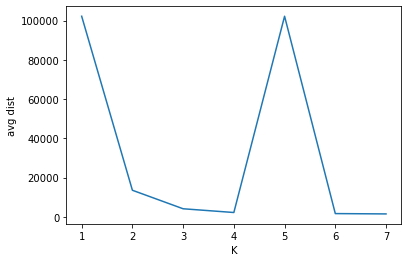

<Figure size 432x288 with 0 Axes>

In [94]:
# random initialization with K-means
import random
def init_centroids_new(K, data):
  # An arbitrary initialization: randomly shuffle inside the range of each feature
  N = data.shape[1]
  centroids = np.zeros((K,N))
  for k in range(K):
    for n in range(N):
      centroids[k][n] = random.triangular(total_feature[n][0],total_feature[n][1])
  return centroids

def k_means_2(K, data):
  # K-means algorithm
  # Initialization
  iiter = 0
  # here we use the random initialization
  centroids = init_centroids_new(K, data)
  centroids, clusters = k_means_step(centroids, data)
  # Measure of successs: sum of average distances
  total_d = unweighted_dist_centroid(centroids, clusters, X)
  print("K-means, iteration = ", iiter, " avg distance = ", total_d)
  cont = True # flag to continue or stop the loop
  while cont:
    # insert K-means loop
    new_centroids,new_clusters = k_means_step(centroids,data)
    iiter+=1
    if (new_clusters == clusters).all():
      cont = False
    centroids, clusters = new_centroids, new_clusters
    # Measure of successs: sum of average distances
    total_d = unweighted_dist_centroid(centroids, clusters, X)
    print("K-means, iteration = ", iiter, " total distance = ", total_d)
  return centroids, clusters


# Tests
avg_distances = []
K_values = np.arange(1, 8)
for K in K_values:
  print("\n\n========== K-means for K = ", K, " ==========")
  centroids, clusters = k_means_2(K, X)
  avg_distances.append(avg_dist_centroid(centroids, clusters, X))

plt.plot(K_values, avg_distances)
plt.xlabel("K")
plt.ylabel("avg dist")
plt.show()
plt.clf()





========== K-means for K =  1  ==========


/var/folders/6f/v5_vm1k90cdc80sb2rp4zc3m0000gn/T/ipykernel_1922/175859018.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_probas = np.sum(probas[n][k] for n in range(N))
/var/folders/6f/v5_vm1k90cdc80sb2rp4zc3m0000gn/T/ipykernel_1922/175859018.py:46: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_probas_x = np.sum(probas[n][k]*data[n] for n in range(N))
/var/folders/6f/v5_vm1k90cdc80sb2rp4zc3m0000gn/T/ipykernel_1922/175859018.py:49: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sum_probas_covs = np.sum(probas[n][k]*(np.array([data[n]-mean_k]).T@ np.array([data[n]-mean_k])) for



========== K-means for K =  2  ==========


========== K-means for K =  3  ==========


========== K-means for K =  4  ==========


========== K-means for K =  5  ==========


========== K-means for K =  6  ==========


========== K-means for K =  7  ==========


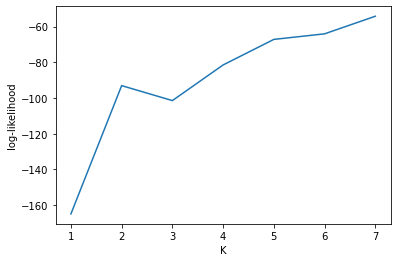

<Figure size 432x288 with 0 Axes>

In [95]:
# random initialization with Expectation Maximization 

def init_gaussians_new(K, data):
  # An arbitrary initialization
  # and covariance = identity matrix
  N = data.shape[1]
  weights = [1/K for k in range(K)]
  means = np.zeros((K,N))
  for k in range(K):
    for n in range(N):
      means[k][n] = random.triangular(total_feature[n][0],total_feature[n][1])
  dim = data.shape[1]
  covs = [np.eye(dim) for k in range(K)]
  return weights, means, covs

def expectation_step(params, data):
  # Expectation step in EM algorithm: given the GMM parameters, return
  # the conditional probabilities of the cluster indices
  n_samples = data.shape[0]
  weights, means, covs = params #[0], params[1], params[2]
  K = len(weights)
  probas = np.zeros((n_samples,K)) 
  for n in range(n_samples):
    # for n-th data, update the prob of the i-th cluster, which shows
    #a prob matrix with size N*K
    # p_value is the value of the i_th gaussian distribution on data point n
    s_value = np.sum([multivariate_normal(means[i], covs[i],allow_singular = True).pdf(data[n])*weights[i] for i in range (K)])
    for k in range(K):
      p_value = multivariate_normal(means[k],covs[k],allow_singular = True).pdf(data[n])*weights[k]
      probas[n][k] = p_value/s_value
    

  return np.asarray(probas)

def maximization_step_2(probas, data):
  # Maximization step in EM algorithm: given the probabilities, return the new
  # parameters for GMM. Here we use formulas obtained by finding maximizers of 
  # the modified likelihood function.
  K = probas.shape[1]
  
  params = init_gaussians_new(K, data)  # TODO: replace
  N = data.shape[0]
  for k in range(K):
    sum_probas = np.sum(probas[n][k] for n in range(N))
    sum_probas_x = np.sum(probas[n][k]*data[n] for n in range(N))
    weight = sum_probas/N
    mean_k = sum_probas_x/sum_probas
    sum_probas_covs = np.sum(probas[n][k]*(np.array([data[n]-mean_k]).T@ np.array([data[n]-mean_k])) for n in range(N))
    cov_k = sum_probas_covs/sum_probas


    params[0][k] = weight
    params[1][k] = mean_k
    params[2][k] = cov_k
  return params

  
def em_algorithm(K, data, n_iter):
  # Expectation-maximization algorithm: return the GMM parameters
  params = init_gaussians(K, data)
  
  for i in range(n_iter):
    probas = expectation_step(params,data)
    params = maximization_step_2(probas, data)
  return params

def log_likelihood(params, data):
  # Compute the log-likelihood
  log_l = 0
  # from the log likelihood formula, we should calculate the expectation parts
  # and the log parts.
  N = data.shape[0]
  K = len(params[0])
  # we first calculate the expectation part
  probas = expectation_step(params, data)
  for n in range(N):
    temp = 0
    for k in range(K):
      # we calculate the log parts.
      t_value = params[0][k]*multivariate_normal(params[1][k],params[2][k],allow_singular = True).pdf(data[n])
      p = probas[n][k]
      # this is the element inside the summation of log likelihood
      ele = p*(np.log10(t_value+1e-5))
      temp += ele
    log_l += temp

  return log_l

# Tests
log_likelihoods = []
K_values = np.arange(1, 8)
n_iter = 50
for K in K_values:
  print("\n\n========== K-means for K = ", K, " ==========")
  params = em_algorithm(K, X, n_iter)
  log_likelihoods.append(log_likelihood(params, X))

plt.plot(K_values, log_likelihoods)
plt.xlabel("K")
plt.ylabel("log-likelihood")
plt.show()
plt.clf()


K-means++ is usually better than K-means for large Ks.
A detailed, statistically sound experiment with averaged performance on different seeds will receive more bonus points.


# Part 3: Dimensionality reduction 

In this section, we explore dimensionality reduction using a simple projection technique.

Let us project the data on the first two features, which means that each data point is now 2-dimensional.

Write a function to visualize K-means clusters (e.g. with colors and markers). Run the K-means algorithm for various values of K and visualize the evolution of the clusters during the algorithm. 



========== K-means for K =  1  ==========
K-means, iteration =  0  avg distance =  574.8792432000107
K-means, iteration =  1  total distance =  574.8792432000107


<AxesSubplot:xlabel='0', ylabel='1'>

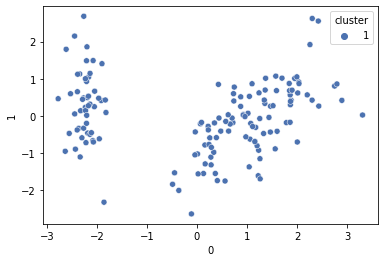

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

def vis_kmeans(clusters, data, feature = [0,1]):
    df_lis = []
    for idx in range(clusters.shape[0]):
        cluster = clusters[idx]
        point = data[list(cluster)]
        df = pd.DataFrame(point)
        df['cluster'] = idx + 1
        df_lis.append(df)
    draw_df = pd.concat(df_lis)
    return sns.scatterplot(data=draw_df, x=feature[0], y=feature[1], hue="cluster",palette="deep")

# pca:
x = StandardScaler().fit_transform(X) # normalizing the features
np.mean(x),np.std(x)

pca_data = PCA(n_components=2)
x_pca = pca_data.fit_transform(x)
# vis
print("\n\n========== K-means for K = ", 1, " ==========")
centroids, clusters = k_means(1, x_pca)
vis_kmeans(clusters,x_pca)







========== K-means for K =  2  ==========
K-means, iteration =  0  avg distance =  477.4356378977865
K-means, iteration =  1  total distance =  298.6020434490001
K-means, iteration =  2  total distance =  197.4038160454129
K-means, iteration =  3  total distance =  197.4038160454129


<AxesSubplot:xlabel='0', ylabel='1'>

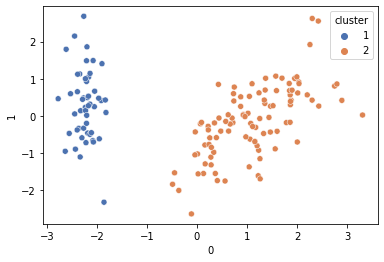

In [98]:
print("\n\n========== K-means for K = ", 2, " ==========")
centroids, clusters = k_means(2, x_pca)
vis_kmeans(clusters,x_pca)



========== K-means for K =  3  ==========
K-means, iteration =  0  avg distance =  423.88865520944995
K-means, iteration =  1  total distance =  201.7564649696493
K-means, iteration =  2  total distance =  184.71425774784154
K-means, iteration =  3  total distance =  162.9232503485373
K-means, iteration =  4  total distance =  122.4750612507484
K-means, iteration =  5  total distance =  117.23530801742501
K-means, iteration =  6  total distance =  115.55413180623346
K-means, iteration =  7  total distance =  115.41830448507721
K-means, iteration =  8  total distance =  115.30540167548124
K-means, iteration =  9  total distance =  115.22494893096548
K-means, iteration =  10  total distance =  115.18647050742707
K-means, iteration =  11  total distance =  115.18647050742707


<AxesSubplot:xlabel='0', ylabel='1'>

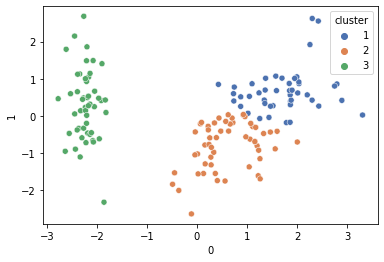

In [99]:
print("\n\n========== K-means for K = ", 3, " ==========")
centroids, clusters = k_means(3, x_pca)
vis_kmeans(clusters,x_pca)



========== K-means for K =  4  ==========
K-means, iteration =  0  avg distance =  396.5349489314403
K-means, iteration =  1  total distance =  184.54156053946505
K-means, iteration =  2  total distance =  148.3398203119901
K-means, iteration =  3  total distance =  126.61603579075029
K-means, iteration =  4  total distance =  101.3441127607108
K-means, iteration =  5  total distance =  97.1605715357902
K-means, iteration =  6  total distance =  93.60281372731983
K-means, iteration =  7  total distance =  90.36827958682503
K-means, iteration =  8  total distance =  90.07216180121465
K-means, iteration =  9  total distance =  89.85331202188264
K-means, iteration =  10  total distance =  89.55181314668194
K-means, iteration =  11  total distance =  89.51333472314353
K-means, iteration =  12  total distance =  89.51333472314353


<AxesSubplot:xlabel='0', ylabel='1'>

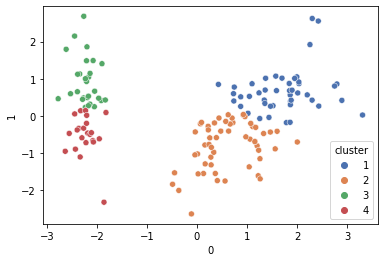

In [100]:
print("\n\n========== K-means for K = ", 4, " ==========")
centroids, clusters = k_means(4, x_pca)
vis_kmeans(clusters,x_pca)



========== K-means for K =  5  ==========
K-means, iteration =  0  avg distance =  313.7027584473595
K-means, iteration =  1  total distance =  104.67809416207294
K-means, iteration =  2  total distance =  82.34885641124674
K-means, iteration =  3  total distance =  80.44056873166984
K-means, iteration =  4  total distance =  80.28643148963866
K-means, iteration =  5  total distance =  80.2059787451229
K-means, iteration =  6  total distance =  80.1675003215845
K-means, iteration =  7  total distance =  80.1675003215845


<AxesSubplot:xlabel='0', ylabel='1'>

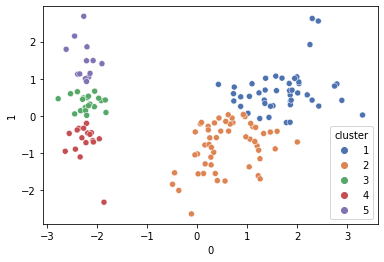

In [101]:
print("\n\n========== K-means for K = ", 5, " ==========")
centroids, clusters = k_means(5, x_pca)
vis_kmeans(clusters,x_pca)



========== K-means for K =  6  ==========
K-means, iteration =  0  avg distance =  286.43432111400466
K-means, iteration =  1  total distance =  83.63108441261545
K-means, iteration =  2  total distance =  78.94631549366036
K-means, iteration =  3  total distance =  78.7178001679203
K-means, iteration =  4  total distance =  78.62316487039959
K-means, iteration =  5  total distance =  78.54037806048203
K-means, iteration =  6  total distance =  78.11666484331954
K-means, iteration =  7  total distance =  78.01870247778112
K-means, iteration =  8  total distance =  78.01870247778112


<AxesSubplot:xlabel='0', ylabel='1'>

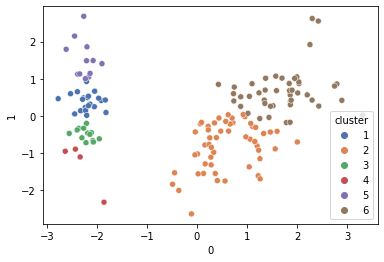

In [102]:
print("\n\n========== K-means for K = ", 6, " ==========")
centroids, clusters = k_means(6, x_pca)
vis_kmeans(clusters,x_pca)



========== K-means for K =  7  ==========
K-means, iteration =  0  avg distance =  285.8562251652541
K-means, iteration =  1  total distance =  82.87676355932672
K-means, iteration =  2  total distance =  78.14719636975295
K-means, iteration =  3  total distance =  77.4351971156432
K-means, iteration =  4  total distance =  77.3967186921048
K-means, iteration =  5  total distance =  77.3967186921048


<AxesSubplot:xlabel='0', ylabel='1'>

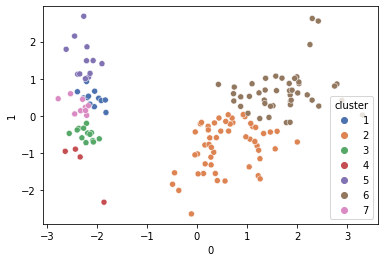

In [103]:
print("\n\n========== K-means for K = ", 7, " ==========")
centroids, clusters = k_means(7, x_pca)
vis_kmeans(clusters,x_pca)